Vathana Him and Andrew Lindberg

# Automobile Dataset

This dataset contains information about specific type of vehicles and their specs. Based on the head and tails visualization, this data set is a dirty data set. There are some values that contains improper formatting and some non-standardized values. For example column['normalized-loss'] contains '?', which is not uniform with the rest of the dataset. Subsequently, column['engine-location'] also contains non-uniform formatting of data value. Additionally, when looking at the entire dataframe, columns [num-of-doors],['bore'],['stroke'],['horsepower'], ['peak-rpm'], and ['price'] also have a few missing values with the '?' data point.

In [ ]:
#libraries
import os #operating system
import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #standard graphics
import seaborn as sns #fancier graphics
from scipy import stats
from sklearn import preprocessing
from functools import reduce

In [ ]:
L = [1,2,3,4,5]

#lambda-calculus (google this) is another way of defining functions
#f is a function that takes two arguments, x and y, 
f = lambda x,y: x+y

#reduce allows us to add the values of L simply
reduce(f,L)

15

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Automobile_data.csv to Automobile_data (2).csv


In [ ]:
data = pd.read_csv('Automobile_data.csv')

In [ ]:
#show the first 5 rows
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front?,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,"front,",99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,"front,front",99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
#show the last 5 rows
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
size = data.size
print(size)
data.shape

5330


(205, 26)

This data frame has a total of 5,330 data points. The dimension of this dataframe is 205 rows by 26 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

There are no null values in this specific dataset; however, review of the data head and tail show question marks ( ? ) to indicate a missing information.

In [ ]:
c = ['?']
data.isin(c).sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
sum(data.isin(c).sum())

59

The table above shows the missing values per column. The most egregious offender is normalized-losses with 41 missing values, and a total of 59 missing values in the data set, indicated by '?'.

In [ ]:
#Descriptive Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [ ]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [ ]:
data['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

In [ ]:
data['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [ ]:
data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [ ]:
data['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [ ]:
data.loc[data['num-of-doors'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [ ]:
is_sedan = data['body-style'] == 'sedan'
data_sedan = data[is_sedan]
data_sedan['num-of-doors'].value_counts()

four    79
two     15
?        2
Name: num-of-doors, dtype: int64

In [ ]:
data['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [ ]:
data['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [ ]:
data['engine-location'].value_counts()

front              179
front,               5
front[location]      5
front[engine]        4
font                 4
rear[end]            3
front?               2
front,front          1
front,               1
front[front]         1
Name: engine-location, dtype: int64

In [ ]:
data['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [ ]:
data['num-of-cylinders'].value_counts()

four      134
for        25
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [ ]:
data['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64

In [ ]:
data.loc[data['bore'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,?,?,9.4,135,6000,16,23,15645


Bore is a measure of the diameter of the engine cylinder, the stroke is the a measure of the distance the traveled by a piston from top to bottom or vice versa, and a rotary engine doesn't have cylinders or pistons; instead [*a triangular rotor is used instead of pistons*](https://auto.howstuffworks.com/rotary-engine.htm).

In [ ]:
data.loc[data['horsepower'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,font,96.1,181.5,66.5,55.2,2579,ohc,for,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,font,96.1,176.8,66.6,50.5,2460,ohc,for,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


In [ ]:
data.loc[data['make'] == 'renault']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,font,96.1,181.5,66.5,55.2,2579,ohc,for,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,font,96.1,176.8,66.6,50.5,2460,ohc,for,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


In [ ]:
data.loc[data['price'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,"front,",99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,font,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [ ]:
data.loc[data['make'] == 'audi']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,"front,",99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,"front,front",99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,"front,",99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,"front,",105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,"front,",105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,"front,",105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,"front,",99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [ ]:
data.loc[data['make'] == 'isuzu']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
43,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
46,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048


In [ ]:
data.loc[data['make'] == 'porsche']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
125,3,186,porsche,gas,std,two,hatchback,rwd,front,94.5,168.9,68.3,50.2,2778,ohc,four,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018
126,3,?,porsche,gas,std,two,hardtop,rwd,rear[end],89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528
127,3,?,porsche,gas,std,two,hardtop,rwd,rear[end],89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028
128,3,?,porsche,gas,std,two,convertible,rwd,rear[end],89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028
129,1,?,porsche,gas,std,two,hatchback,rwd,font,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


# Pt 2. Data Cleaning

For "normalized-losses", "num-of-doors", "bore", "stroke", "horsepower", "peak-rpm", and "price" there are missing values because it has "?" in its place.

"Normalized-losses," "bore," "stroke," "horsepower," "peak-rpm," and "price" data need to first be converted to numeric values.

1.   For number-of-doors, there are only two missing values. If it's possible to find the year these models were produced, brand, price, and engine size could be used to make an educated guess on number of doors. Without that information, we can reference the 'body-style' column, which should offer some insight as to the 'type' of car. In this data set, there are 79 four-door sedans, 15 two-door sedans, and two missing pieces of data. Since four-door is the mode for the entire data set and for sedans, replace the missing values with four-doors.

2.   Normalized-losses is a factor relative to the average loss payment per insured vehicle per year. These values are normalized for all autos within a particular size classification such as SUV, compact car, sports car, etc. There should be some relationship between insurance assigned risk factors (symboling), number of doors, and horsepower.  
    - According to the [Insurance Institute for Highway Safety (IIHS)](https://www.iihs.org/ratings/top-safety-picks), *Larger, heavier vehicles generally afford more protection than smaller, lighter ones.* As such, vehicles with a higher curbweight may have lower normalized losses because passengers are less likely to need medical attention. Alternatively, a new Ford F-150, [America's best-selling vehicle for 37 years](https://www.torquenews.com/3768/latest-numbers-show-just-how-popular-ford-f-150), has a starting MSRP of nearly 45% more than a base model Honda Civic ( $30,000 vs $20,650 ). If the majority of losses come from damage to vehicles, then a lower curbweight may have lower normalized losses.
    - Given that loss data is likely to be observational, and the high possibility of confounding variables to influence losses; the best course of action would be to perform hypothesis testing for the correlation of different variables to normalized losses, and substitute the missing data with some sort of linear interpolation.

3. 'Bore' and 'stroke' are missing on vehicles with rotary engines, and this data should be deleted without replacement.

4.  The missing 'horsepower' and 'peak-rpm' data are renault vehicles with an engine size of 132, four cylinders, and mpg of 23/31 (city/hwy) - one wagon and one hatchback. According to the [United States Department of Energy](https://afdc.energy.gov/files/pdfs/1985_feg.pdf), Renault made an 18I 4DR wagon in 1985 with an engine that has four cylinders, 132 cubic inch displacement, and 23/31 mpg (city/hwy). The [Douvrin engine](https://en.wikipedia.org/wiki/Douvrin_engine) in that car, has a shorter piston stroke (3.5 vs. 3.9 in the dataset) and a different compression ratio (8.8 vs 8.7). The Douvrin's horsepower is somewhere between 108-135. The smaller version of the same engine has a peak-rpm of 6,000.
    - Hypothesis testing for a relationship between horsepower and naturally aspirated (std), gas engine sizes is likely to show a relationship between engine size and horsepower. If there is sufficient evidence, linear interpolation could be used for this data. otherwise, review the distribution of the data and substitute the median or mean.
    - Peak-rpm data needs to be reviewed for distribution shape. If normal, substitue for the mean, if skewed, use the median.

5. Brand data can often be used as a reference for price, especially when considering that some of the missing price data is for luxury imported vehicles such as Audi and Porsche. If the median price for each of these brands is in the upper quartile of prices, then the median price for the brand should be substituted for the missing data. Check to ensure that Isuzu is less of an outlier, and if it is, use the median price for these missing data points.

***

For "engine-location" the formatting of the enginge location should be either "front" or "rear" and will replace the incorrect formatting in the data frame.

For "engine-size" the outliers, which is considered to be greater than or less than Q1-1.5IQR and Q3+1.5IQR of its distribution will be replaced with the mean value.

Based on the analysis above we can determine that columns "normalized-losses", "engine-location", and "engine-size" contains dirty data because each has missing values, typos, and outliers respectively, and will targeted for cleaning.

In [ ]:
targeted_column_list = ["normalized-losses","engine-location","engine-size"]
df_set = data[targeted_column_list]
df_set

,normalized-losses,engine-location,engine-size
0,?,front[front],130
1,?,front?,130
2,?,front?,152
3,164,"front,",109
4,164,"front,front",136
...,...,...,...
200,95,front,141
201,95,front,141
202,95,front,173
203,95,front,145


In [ ]:
summary = df_set["engine-size"].describe()
summary

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64

In [ ]:
#find Interquartile range so we can use to calculate for outliers 
IQR = summary[6]-summary[4]
lowerQoutliers = summary[4] - (1.5*IQR)
upperQoutliers = summary[6] + (1.5*IQR)
print("IQR: "+str(IQR), "lower outlier: "+str(lowerQoutliers), "upper outlier: "+str(upperQoutliers))

IQR: 44.0 lower outlier: 31.0 upper outlier: 207.0


In [ ]:
def cleaning(df_set): 
    #replace missing values of ? with mean for column normalized-losses 
    mean = 0
    total = 0
    count = 0
    for i, row in df_set.iterrows():
        if row["normalized-losses"] != '?':
            total = total+int(i)
            count = count + 1
            mean = total/count

    for i, row in df_set.iterrows():
        if row["normalized-losses"] == '?':
            df_set.at[i,"normalized-losses"] = round(mean)

    #replace outliers of column "engine-size" with the mean anything greater than 75% of distribution for this column is outliers
    mean = 0
    total = 0
    count = 0
    for i, row in df_set.iterrows():
        if row["engine-size"] != '?':
            total = total+int(i)
            count = count + 1
            mean = total/count
    for i, row in df_set.iterrows():
        if int(row["engine-size"]) > upperQoutliers or int(row["engine-size"]) < lowerQoutliers:
            df_set.at[i,"engine-size"] = round(mean)
    
    #cleans up the formatting of the string in column "engine-location"
    unwanted_char = []
    L = np.array(df_set["engine-location"]).astype(np.str)
    conc = lambda x,y: x+y
    total_char = set(reduce(conc,L))

    #find targeted character that tells from what index we should remove
    for i in total_char:
        if(i=='['or i =="," or i=="?"):
            unwanted_char.append(i)

    for i, row in df_set.iterrows():
        current_str = str(row["engine-location"])
        for j in unwanted_char:
            if j in current_str:
                char_index = current_str.find(j)
                current_str = current_str[:char_index]
                df_set.at[i,"engine-location"] = current_str
    return df_set

cleaning(df_set)

,normalized-losses,engine-location,engine-size
0,107,front,130
1,107,front,130
2,107,front,152
3,164,front,109
4,164,front,136
...,...,...,...
200,95,front,141
201,95,front,141
202,95,front,173
203,95,front,145


In [ ]:
df2 = data
cleaning(df2)

df2 = df2.replace('?', np.NaN)
df2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,107,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,107,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,107,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
df2['bore'] = df2['bore'].astype(float)

In [ ]:
df2['stroke'] = df2['stroke'].astype(float)

In [ ]:
df2['horsepower'] = df2['horsepower'].astype(float)

In [ ]:
df2['peak-rpm'] = df2['peak-rpm'].astype(float)

In [ ]:
df2['price'] = df2['price'].astype(float)

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,119.448780,28.632108,61.00,97.00,110.00,136.00,203.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17
compression-ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


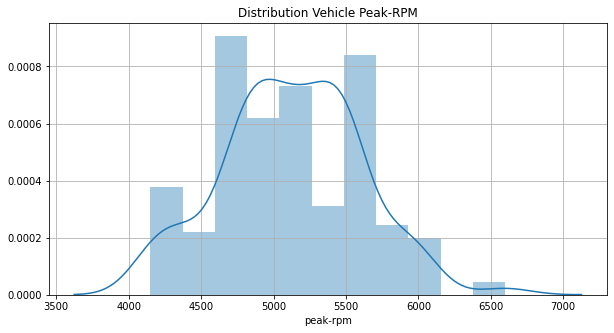

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Distribution Vehicle Peak-RPM")
ax = sns.distplot(df2["peak-rpm"])
plt.grid()

Peak-RPM distribution is mostly normal, substitute mean peak-rpm for missing data.

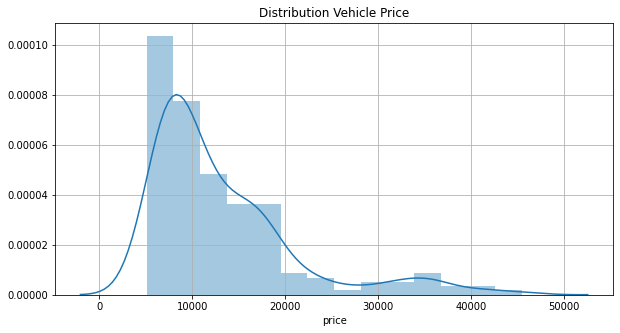

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Distribution Vehicle Price")
ax = sns.distplot(df2["price"])
plt.grid()

Vehicle price distribution is heavily right skewed.

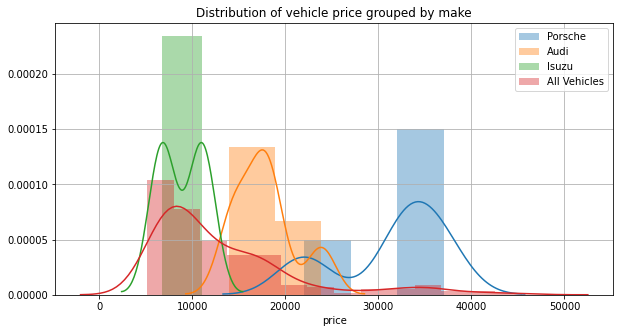

In [ ]:
# Create a figure, add title
plt.figure(figsize=(10,5))
plt.title("Distribution of vehicle price grouped by make")

# Plot the distribution of Porsche
mask0 = df2['make'] == 'porsche'
ax = sns.distplot(df2["price"][mask0], label = 'Porsche')

# Plot the histogram of Audi
mask1 = df2['make'] == 'audi'
ax = sns.distplot(df2["price"][mask1], label = 'Audi')

mask2 = df2['make'] == 'isuzu'
ax = sns.distplot(df2['price'][mask2], label = 'Isuzu')

#Plot the histogram of All Prices
ax = sns.distplot(df2["price"], label = 'All Vehicles')

# add legend, show the graphics
plt.legend()
plt.grid()

In [ ]:
is_audi = df2['make'] == 'audi'
data_audi = df2[is_audi]
data_audi['price'].describe().T

count        6.000000
mean     17859.166667
std       3452.379493
min      13950.000000
25%      15800.000000
50%      17580.000000
75%      18617.500000
max      23875.000000
Name: price, dtype: float64

In [ ]:
data_audi['price'].median()

17580.0

In [ ]:
is_porsche = df2['make'] == 'porsche'
data_porsche = df2[is_porsche]
data_porsche['price'].describe().T

count        4.000000
mean     31400.500000
std       6528.784343
min      22018.000000
25%      29900.500000
50%      33278.000000
75%      34778.000000
max      37028.000000
Name: price, dtype: float64

In [ ]:
data_porsche['price'].median()

33278.0

In [ ]:
is_isuzu = df2['make'] == 'isuzu'
data_isuzu = df2[is_isuzu]
data_isuzu['price'].describe().T

count        2.000000
mean      8916.500000
std       3014.396208
min       6785.000000
25%       7850.750000
50%       8916.500000
75%       9982.250000
max      11048.000000
Name: price, dtype: float64

In [ ]:
data_isuzu['price'].median()

8916.5

# Pt 3

In real world scenarios sometimes data does not come in a format that is ideal for doing analysis or model. This is because the data may be skewed or data can be better analyzed if certain features of its variable are combined. For the engine_size, there are certain cars that have extremely larger engine then the median engine_size of the entire data, this will cause a skew distribution, there for we must transform it to standardize its scale. In addition, there may also be imbalanced data within the data set. For example in this data set, in the column aspiration, there are far more cars who has standard aspirators instead of turbo. This will cause our variables of interest to be unevenly represented if we do analyze this column.

A normalization transformation would be best for the data set since it will scale the data appropriately since engine_size and high_way mpg have different measurements.

In [ ]:
df = df2

engine_size = df['engine-size']
highway_mpg = df['highway-mpg']
data_to_plot = [engine_size, highway_mpg]
data_to_plot

[0      130
 1      130
 2      152
 3      109
 4      136
       ... 
 200    141
 201    141
 202    173
 203    145
 204    141
 Name: engine-size, Length: 205, dtype: int64, 0      27
 1      27
 2      26
 3      30
 4      22
        ..
 200    28
 201    25
 202    23
 203    27
 204    25
 Name: highway-mpg, Length: 205, dtype: int64]

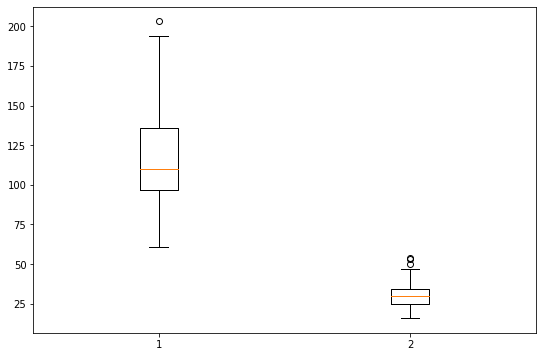

In [ ]:
fig = plt.figure(1, figsize=(9,6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
plt.show()

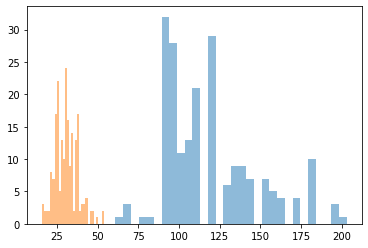

In [ ]:
plt.hist(engine_size, alpha=0.5, label='enginesize', bins=30)
plt.hist(highway_mpg, alpha=0.5, label='highwaympg', bins=30)
plt.show()

As one can see in the boxplot figure above, the boxplots show outliers in both variables of dataset. 
Additionally in the histogram figure, we can see that there is a difference in scales of the two variables, 
thus we need to use minmax normalization to normalize these scales so the two dataset will have similar features. 
In [35]:

In [ ]:
def minmaxnorm(col):
    col = (col-col.min())/(col.max()-col.min())
    return col
normalized_enginesize = minmaxnorm(engine_size)
normalized_highwaympg = minmaxnorm(highway_mpg)

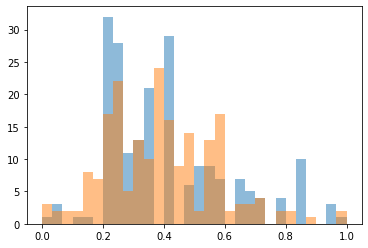

In [ ]:
plt.hist(normalized_enginesize, alpha=0.5, label='enginesize', bins=30)
plt.hist(normalized_highwaympg, alpha=0.5, label='highwaympg', bins=30)
plt.show()

The plot after normalization would be best used to compare the data because it normalized both dataset so each will have 
similar features as shown above.